In [12]:
# to subpress warning
import warnings
warnings.filterwarnings("ignore")


# The OS module in Python provides functions for interacting with the operating system.
import os

# Matplotlib is a data visualization and graphical plotting library for Python.
import matplotlib.pyplot as plt

# seaborn is alse a data visualization and graphical plotting library for Python.
import seaborn as sn

# Used to display markdown,image,control (frontend utilities)
from IPython.display import display, clear_output

# NumPy is a Python library used for working with arrays
import numpy as np

import pandas as pd

import pickle
# used to split dataset(features and target) into test and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# shuffle the dataset for a even mixture of each type of feature and target.it gives better result.
from sklearn.utils import shuffle

# Computer vision library
import cv2

# Used to manipulate different parts of the Python runtime environment.
import sys

# An open-source framework for building pipelines to perform computer vision inference.
import mediapipe as mp

# Time module provide time-related functions
import time

# Used to generate random numbers
import random

from math import log10, sqrt
# for mathematical operations

# Keras is a library that provides a Python interface for artificial neural networks. 
# Keras acts as an interface for the TensorFlow library.
import keras

import tensorflow as tf

# 1. Keras layers are the building blocks of the Keras library that can be stacked together for creating neural network models.
# 2. Keras Conv2D creates a 2D convolution kernel that is wind with layers input which helps produce a tensor of outputs.
# 3. maxpooling2D Downsamples the input along its spatial dimensions by taking the maximum value over an input window for each channel of the input. 
# 4 .Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
# 5 .Dropout regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
# 6. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

#  Model groups layers into an object with training and inference features.
from tensorflow.keras.models import Model

# Optimizers are the extended class, which include added information to train a specific model.  
# The optimizers are used for improving speed and performance for training a specific model.
# Adam is a stochastic gradient descent method based on adaptive estimation of first-order and second-order moments.
from tensorflow.keras.optimizers import Adam

# importing Sqquential model
from tensorflow.keras import Sequential

# tensorflow.keras.callbacks is used to visualize training of a model.
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint 

In [13]:
# GPU Info 
try:
    import GPUtil
except:
    !pip install GPUtil
    import GPUtil

    
# check physical computing devices
device=tf.config.experimental.list_physical_devices()
for i in device:
    print(i)
if len(device)>1:
    # find GPU details
    print("="*20, "GPU Details", "="*20)
    gpus = GPUtil.getGPUs()
    for gpu in gpus:
        print(gpu_id,gpu.name, gpu.driver,gpu.memoryTotal,gpu.temperature)



PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [14]:
test_object={}
with (open("test_data.pkl", "rb")) as openfile:
    try:
        test_object=pickle.load(openfile)
    except EOFError as e:
        print("Error : ",e)

test_x=test_object["test_x"]
test_y=test_object["test_y"]
testFilenames=test_object["testFilenames"]
unique_sign=test_object["unique_sign"]

In [15]:
model = tf.keras.models.load_model('./model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                1800      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 36)                1476      
                                                                 
Total params: 4,916
Trainable params: 4,916
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_pred_eval=model.evaluate(test_x, test_y)
y_pred=model.predict(test_x)

8/8 [==============================] - 2s 6ms/step - loss: 0.2155 - accuracy: 0.9246


In [17]:
y_pred_labels=[unique_sign[np.argmax(i)] for i in y_pred]
y_test_labels=[unique_sign[np.argmax(i)] for i in test_y.values]
df = pd.DataFrame(list(zip(y_pred_labels, y_test_labels)),
               columns =['Original', 'predicted'])
df

,Original,predicted
0,k,k
1,8,8
2,y,y
3,b,b
4,1,1
...,...,...
247,t,t
248,5,5
249,c,c
250,x,x


In [18]:
Correct=0
wrong=0
accuracy=round(y_pred_eval[1]*100,2)
for i in range(len(y_pred)):
    if y_pred_labels[i]==y_test_labels[i]:
        Correct+=1
    else:
        print("index {} | Original {} | predicted {}".format(i,y_test_labels[i],y_pred_labels[i]))
        wrong+=1
print("\n\n-----| Evaluation Result |-----")
print("Total : {} \nRight : {} \nWrong : {}".format(len(y_pred),Correct,wrong))
print("Accuracy : {}".format(accuracy))

index 14 | Original w | predicted 6
index 20 | Original w | predicted 6
index 39 | Original m | predicted n
index 49 | Original g | predicted h
index 90 | Original m | predicted o
index 100 | Original w | predicted 6
index 112 | Original 0 | predicted o
index 118 | Original w | predicted 6
index 135 | Original t | predicted s
index 146 | Original s | predicted t
index 147 | Original 0 | predicted o
index 158 | Original t | predicted a
index 205 | Original u | predicted r
index 209 | Original z | predicted 1
index 213 | Original o | predicted 0
index 224 | Original w | predicted 6
index 232 | Original 4 | predicted 5
index 238 | Original w | predicted 6
index 246 | Original w | predicted 6


-----| Evaluation Result |-----
Total : 252 
Right : 233 
Wrong : 19
Accuracy : 92.46


Text(0.5, 1.0, 'ASL_keypoint_detector  |    accuracy : 92.46')

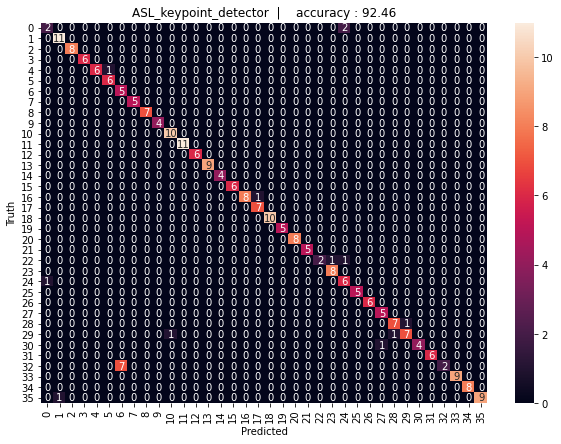

In [19]:
y_pred_labels1=[np.argmax(i) for i in y_pred]
y_test_labels1=[np.argmax(i) for i in test_y.values]
cm=tf.math.confusion_matrix(labels=y_test_labels1,predictions=y_pred_labels1)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("ASL_keypoint_detector  |    accuracy : "+str(round(accuracy,4)))

In [20]:
print(classification_report(y_test_labels1,y_pred_labels1))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      0.86      0.92         7
           5       0.86      1.00      0.92         6
           6       0.42      1.00      0.59         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         4
          10       0.91      1.00      0.95        10
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      0.89      0.94         9
          17       0.88    